In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file("Community_Planning_Areas.geojson")
gdf.head()

gdf2 = gpd.read_file("Neighborhoods of Columbus.geojson")
gdf2.head()


,Name,description,geometry
0,Abby Trails,None,"POLYGON Z ((-82.79754 39.88452 0, -82.79608 39..."
1,Agler,None,"POLYGON Z ((-82.9504 40.02029 0, -82.95017 40...."
2,Albany Commons,None,"POLYGON Z ((-82.84378 40.0792 0, -82.84489 40...."
3,Alum Crest Acres,None,"POLYGON Z ((-82.93828 39.90643 0, -82.9288 39...."
4,Amercrest,None,"POLYGON Z ((-82.97446 39.98583 0, -82.95772 39..."


In [17]:
gdf = gdf.set_index("PLAN_AREA_NUM") # sets the index of the geometry object to be with respect to the planning area number column
#gdf2 = gdf2.set_index("Name")

gdf.crs # informs us about the details of the Coordinate Reference System (CRS) being used 
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdf["boundary"] = gdf.boundary  # calculates the length of the perimeters of each district 
gdf["area"] = gdf.area  # calculates the area of each district
#print(gdf["boundary"])
print(gdf["area"]) # not a good idea to do this just yet (as you will see why in a moment)

PLAN_AREA_NUM
2     0.003607
4     0.011423
6     0.004204
5     0.002879
14    0.001937
20    0.004811
25    0.024236
19    0.000989
12    0.004420
21    0.010682
8     0.002922
13    0.001151
3     0.006434
1     0.006893
10    0.001691
7     0.010030
9     0.005366
11    0.003012
18    0.000669
15    0.004229
16    0.000798
22    0.002635
17    0.002945
24    0.005198
23    0.003973
27    0.003050
26    0.021562
Name: area, dtype: float64


C:\Users\Brock\AppData\Local\Temp\ipykernel_27472\1178182891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["area"] = gdf.area  # calculates the area of each district


In [19]:
# Need to convert to a local projection with proper units of distance and area (i.e. not in terms of degrees latitude & longitude) 
Cbus_3735 = gdf.to_crs("EPSG:3735")
Cbus_3735.crs

Cbus_Neighborhoods = gdf2.to_crs("EPSG:3735")
Cbus_Neighborhoods.crs

<Projected CRS: EPSG:3735>
Name: NAD83 / Ohio South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Ohio - counties of Adams; Athens; Belmont; Brown; Butler; Champaign; Clark; Clermont; Clinton; Darke; Fairfield; Fayette; Franklin; Gallia; Greene; Guernsey; Hamilton; Highland; Hocking; Jackson; Lawrence; Licking; Madison; Meigs; Miami; Monroe; Montgomery; Morgan; Muskingum; Noble; Perry; Pickaway; Pike; Preble; Ross; Scioto; Vinton; Warren; Washington.
- bounds: (-84.83, 38.4, -80.7, 40.36)
Coordinate Operation:
- name: SPCS83 Ohio South zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Can now plot
Cbus_3735["boundary"] = Cbus_3735.boundary  # calculates the length of the perimeters of each district 
Cbus_3735["area"] = Cbus_3735.area  # calculates the area of each district

Cbus_Neighborhoods["boundary"] = Cbus_Neighborhoods.boundary  # calculates the length of the perimeters of each district 
Cbus_Neighborhoods["area"] = Cbus_Neighborhoods.area  # calculates the area of each district

Sq_ft_2_mi = 5280**2 # conversion factor to sq miles from ft
print(Cbus_3735["area"]/Sq_ft_2_mi)

PLAN_AREA_NUM
2     13.181639
4     41.763047
6     15.374216
5     10.529957
14     7.090519
20    17.623695
25    88.858088
19     3.623137
12    16.175517
21    39.103041
8     10.694514
13     4.213876
3     23.513037
1     25.199826
10     6.187217
7     36.709539
9     19.640135
11    11.018836
18     2.451216
15    15.492706
16     2.922166
22     9.654833
17    10.794240
24    19.052871
23    14.566978
27    11.184337
26    79.116058
Name: area, dtype: float64
0      1.702893
1      0.363227
2      0.484885
3      0.381637
4      0.890948
         ...   
283    0.355590
284    0.716918
285    0.808512
286    1.518951
287    0.188789
Name: area, Length: 288, dtype: float64


In [ ]:
Cbus_Neighborhoods.head()
print(Cbus_Neighborhoods["area"]/Sq_ft_2_mi)

0      4.747393e+07
1      1.012618e+07
2      1.351782e+07
3      1.063942e+07
4      2.483821e+07
           ...     
283    9.913276e+06
284    1.998652e+07
285    2.254002e+07
286    4.234593e+07
287    5.263146e+06
Name: area, Length: 288, dtype: float64


<Axes: >

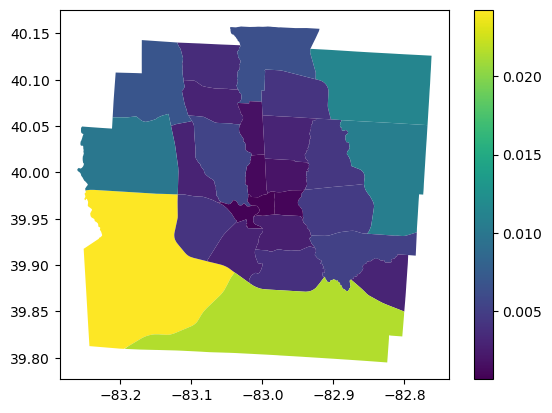

In [22]:
gdf.plot("area", legend=True)

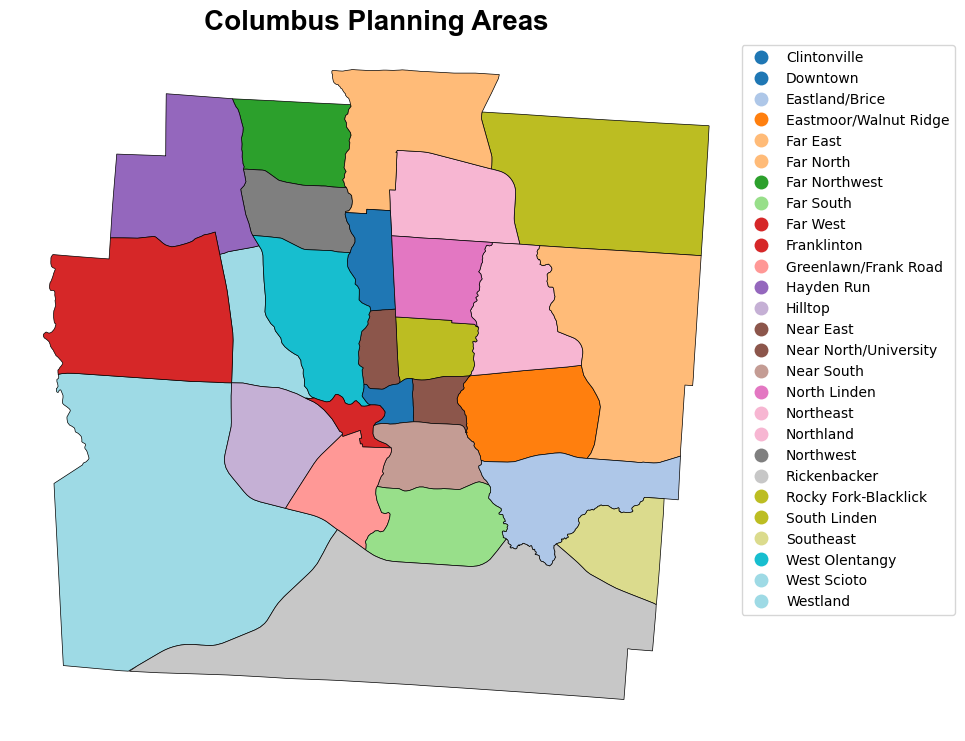

In [23]:
# Plotting the neighborhoods
fig,ax = plt.subplots(figsize=(16,9)) # Set figure size (16:9 aspect ratio)
ax.axis("off") # removes unnecessary border grid
ax.set_title("Columbus Planning Areas",fontname="arial",fontweight='bold',fontsize=20)
ColumbusMap = Cbus_3735.plot(ax=ax,column="PLAN_AREA_NAME", cmap="tab20", edgecolor="k",linewidth=0.5,legend=True,legend_kwds={'bbox_to_anchor':(1.3,1)})

# Save as 4K PNG
#plt.savefig("CbusCrimeMap_4k.png", dpi=240) # DPI = 240 ensures 3840x2160 resolution
# Save as svg
#plt.savefig("CbusCrimeMap_4k.svg")

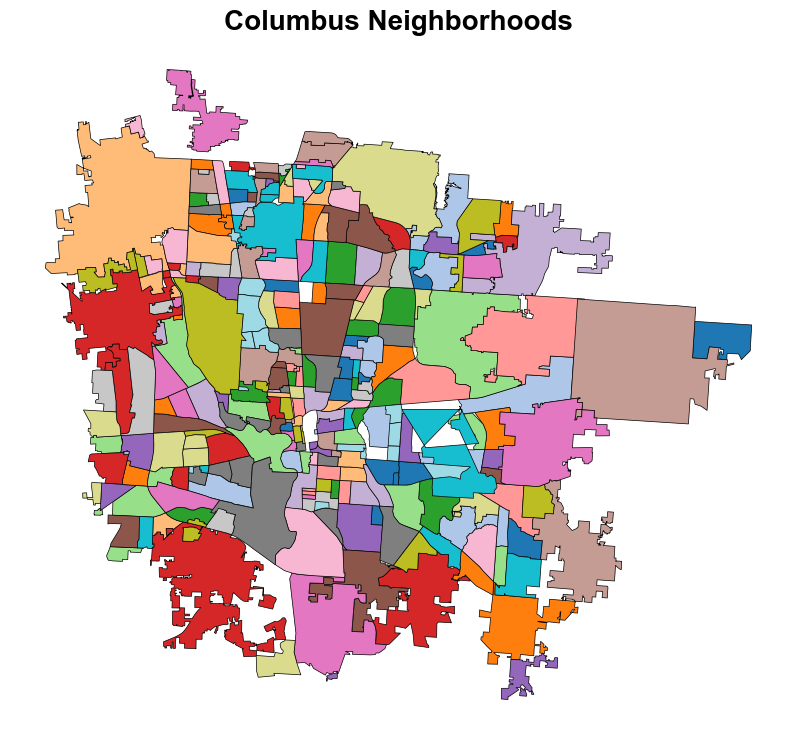

In [24]:
# Plotting the neighborhoods in an alternative way
fig2,ax2 = plt.subplots(figsize=(16,9)) # Set figure size (16:9 aspect ratio)
ax2.axis("off") # removes unnecessary border grid
ax2.set_title("Columbus Neighborhoods",fontname="arial",fontweight='bold',fontsize=20)
ColumbusMap2 = Cbus_Neighborhoods.plot(ax=ax2, cmap="tab20", edgecolor="k",linewidth=0.5,legend=False,legend_kwds={'bbox_to_anchor':(1.3,1)})

# Save as 4K PNG
#plt.savefig("CbusCrimeMap_4k.png", dpi=240) # DPI = 240 ensures 3840x2160 resolution
# Save as svg
#plt.savefig("CbusCrimeMap_4k.svg")

In [25]:
# Creating an interactive plot
Cbus_3735.explore(
    column="PLAN_AREA_NAME",  # make choropleth based on "PLAN_AREA_NAME" column
    tooltip="PLAN_AREA_NAME",  # show "PLAN_AREA_NAME" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="tab20",  # use "tab20" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
    legend=True,
    legend_kwds={'bbox_to_anchor':(1.3,1)}
)

In [26]:
# Creating an interactive plot
Cbus_Neighborhoods.explore(
    column="Name",  # make choropleth based on "PLAN_AREA_NAME" column
    tooltip="Name",  # show "PLAN_AREA_NAME" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="tab20",  # use "tab20" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
    legend=False,
    legend_kwds={'bbox_to_anchor':(1.3,1)}
)

In [27]:
# Importing Cleaned dataset
df = pd.read_csv("df_cleaned.csv")
df.head()

C:\Users\Brock\AppData\Local\Temp\ipykernel_27472\651973130.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_cleaned.csv")


,Unnamed: 0,PARCEL ID,YEARBLT,APPRTOT,PRICE,GRADE,Street Number,Street Name,City,Zip Code,County,Latitude,Longitude,System-Owned Pipe Classification,Previously Lead?,Customer-Owned Pipe Classification
0,0,010-095828,1952,101600,0.0,D+2,1160,ABERDEEN AVE,COLUMBUS,43211-1342,FRANKLIN,40.021579,-82.980427,CU,Y,GAL
1,1,010-076087,1924,103400,0.0,D+1,1173,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021254,-82.980054,CU,Y,GAL
2,2,010-076101,1927,99500,0.0,D+1,1237,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021125,-82.978349,CU,Y,GAL
3,3,010-059808,1950,95900,0.0,D+2,1282,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021415,-82.977124,CU,Y,GAL
4,4,010-042707,1900,163500,19500.0,C,1304,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021370,-82.976541,CU,Y,GAL


In [28]:
# Importing the cleaned data of each home and creating the necessary geopandas dataframe
homes = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

homes.crs # note how we used the global crs for lat. & long. in degress

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# As begfore we convert to the Ohio survey coordinate system
Cbus_Homes = homes.to_crs("EPSG:3735")
Cbus_Homes.crs
# Doing this will allow us to calculate distances between homes 
# in useful units

<Projected CRS: EPSG:3735>
Name: NAD83 / Ohio South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Ohio - counties of Adams; Athens; Belmont; Brown; Butler; Champaign; Clark; Clermont; Clinton; Darke; Fairfield; Fayette; Franklin; Gallia; Greene; Guernsey; Hamilton; Highland; Hocking; Jackson; Lawrence; Licking; Madison; Meigs; Miami; Monroe; Montgomery; Morgan; Muskingum; Noble; Perry; Pickaway; Pike; Preble; Ross; Scioto; Vinton; Warren; Washington.
- bounds: (-84.83, 38.4, -80.7, 40.36)
Coordinate Operation:
- name: SPCS83 Ohio South zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [30]:
#import folium

#m = Cbus_3735.explore(
#    column="PLAN_AREA_NAME",  # make choropleth based on "PLAN_AREA_NAME" column
#    tooltip="PLAN_AREA_NAME",  # show "PLAN_AREA_NAME" value in tooltip (on hover)
#    popup=True,  # show all values in popup (on click)
#    #tiles="CartoDB positron",  # use "CartoDB positron" tiles
#    cmap="tab20",  # use "tab20" matplotlib colormap
#    style_kwds=dict(color="black"),  # use black outline
#    legend=True,
#    legend_kwds={'bbox_to_anchor':(1.3,1)}
#)

#Cbus_Homes.explore(
#    m=m,  # pass the map object
#    color="k",  # use red color on all points
#    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
#    tooltip="Street Number",  # show "name" column in the tooltip
#    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
#    name="Homes",  # name of the layer in the map
#)

#folium.TileLayer("CartoDB positron", show=True).add_to(
#    m
#)  # use folium to add alternative tiles
#folium.LayerControl().add_to(m)  # use folium to add layer control
#
#m  # show map